# Program 4:Implement Decision Tree

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv(r"C:\Users\HP\Downloads\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
print('N0. of zero values in Glucose',df[df['Glucose']==0].shape[0])
print('N0. of zero values in BloodPressure',df[df['BloodPressure']==0].shape[0])
print('N0. of zero values in SkinThickness',df[df['SkinThickness']==0].shape[0])
print('N0. of zero values in Insulin',df[df['Insulin']==0].shape[0])
print('N0. of zero values in BMI',df[df['BMI']==0].shape[0])

N0. of zero values in Glucose 5
N0. of zero values in BloodPressure 35
N0. of zero values in SkinThickness 227
N0. of zero values in Insulin 374
N0. of zero values in BMI 11


In [7]:
#replace zero values with mean
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())

In [8]:
print('N0. of zero values in Glucose',df[df['Glucose']==0].shape[0])
print('N0. of zero values in BloodPressure',df[df['BloodPressure']==0].shape[0])
print('N0. of zero values in SkinThickness',df[df['SkinThickness']==0].shape[0])
print('N0. of zero values in Insulin',df[df['Insulin']==0].shape[0])
print('N0. of zero values in BMI',df[df['BMI']==0].shape[0])

N0. of zero values in Glucose 0
N0. of zero values in BloodPressure 0
N0. of zero values in SkinThickness 0
N0. of zero values in Insulin 0
N0. of zero values in BMI 0


In [9]:
x=df[['Pregnancies','Insulin','SkinThickness','BMI','Age','Glucose','BloodPressure','DiabetesPedigreeFunction']]
y=df['Outcome']

In [10]:
x

,Pregnancies,Insulin,SkinThickness,BMI,Age,Glucose,BloodPressure,DiabetesPedigreeFunction
0,6,79.799479,35.000000,33.6,50,148.0,72.0,0.627
1,1,79.799479,29.000000,26.6,31,85.0,66.0,0.351
2,8,79.799479,20.536458,23.3,32,183.0,64.0,0.672
3,1,94.000000,23.000000,28.1,21,89.0,66.0,0.167
4,0,168.000000,35.000000,43.1,33,137.0,40.0,2.288
...,...,...,...,...,...,...,...,...
763,10,180.000000,48.000000,32.9,63,101.0,76.0,0.171
764,2,79.799479,27.000000,36.8,27,122.0,70.0,0.340
765,5,112.000000,23.000000,26.2,30,121.0,72.0,0.245
766,1,79.799479,20.536458,30.1,47,126.0,60.0,0.349


In [11]:
y.values

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x)
X=scaler.transform(x)

In [13]:
# Splitting Dataset into Training and Test Set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)


In [14]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(max_depth=2,random_state=1)
clf=clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

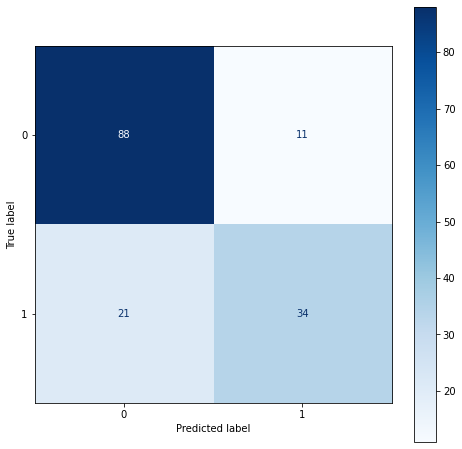

In [15]:
from sklearn.metrics import plot_confusion_matrix
fig,ax=plt.subplots(figsize=(8,8))
disp=plot_confusion_matrix(clf,x_test,y_test,labels=np.unique(y),cmap=plt.cm.Blues,ax=ax)

In [16]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7922077922077922


In [17]:
from sklearn.metrics import accuracy_score,classification_report
print("Accuracy score of training data using gini index)" ,accuracy_score(y_true=y_train,y_pred=clf.predict(x_train)))
print("Accuracy score of testing data using gini index)",accuracy_score(y_true=y_test,y_pred=y_pred))

Accuracy score of training data using gini index) 0.7654723127035831
Accuracy score of testing data using gini index) 0.7922077922077922


In [18]:
print("classification Report")
print(classification_report(y_test,y_pred))

classification Report
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        99
           1       0.76      0.62      0.68        55

    accuracy                           0.79       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.79      0.79      0.79       154



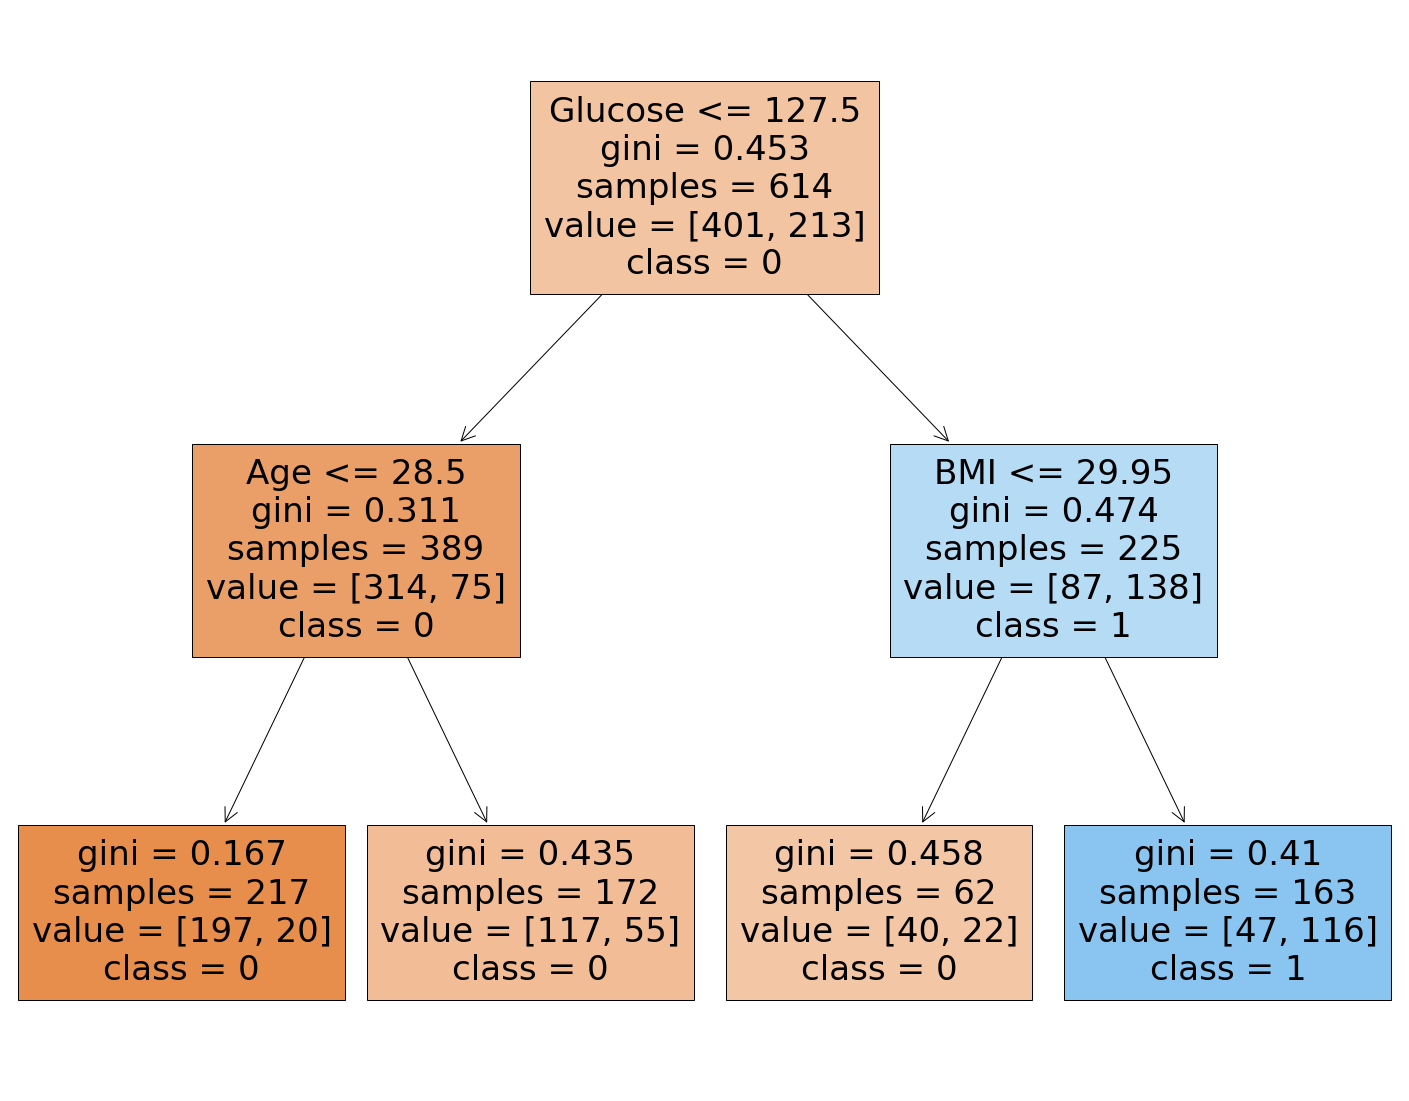

In [20]:
target_names=['0','1']
feature_cols = x.columns
from sklearn import tree
fig = plt.figure(figsize=(25,20))
v= tree.plot_tree(clf, 
                   feature_names = feature_cols,class_names=target_names,
                   filled=True)

In [21]:
#using entropy
clf = DecisionTreeClassifier(criterion='entropy',max_depth=5)
clf = clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

In [22]:
from sklearn.metrics import accuracy_score 
print("Accuracy score on training data(Using gini index)", accuracy_score(y_true = y_train,y_pred = clf.predict(x_train)))
print("Accuracy score on testing data(Using gini index)", accuracy_score(y_true = y_test,y_pred = y_pred))

Accuracy score on training data(Using gini index) 0.7996742671009772
Accuracy score on testing data(Using gini index) 0.7922077922077922


In [23]:
clf.predict([[22,55,78,20,1,25,0.523,30]])

array([0], dtype=int64)

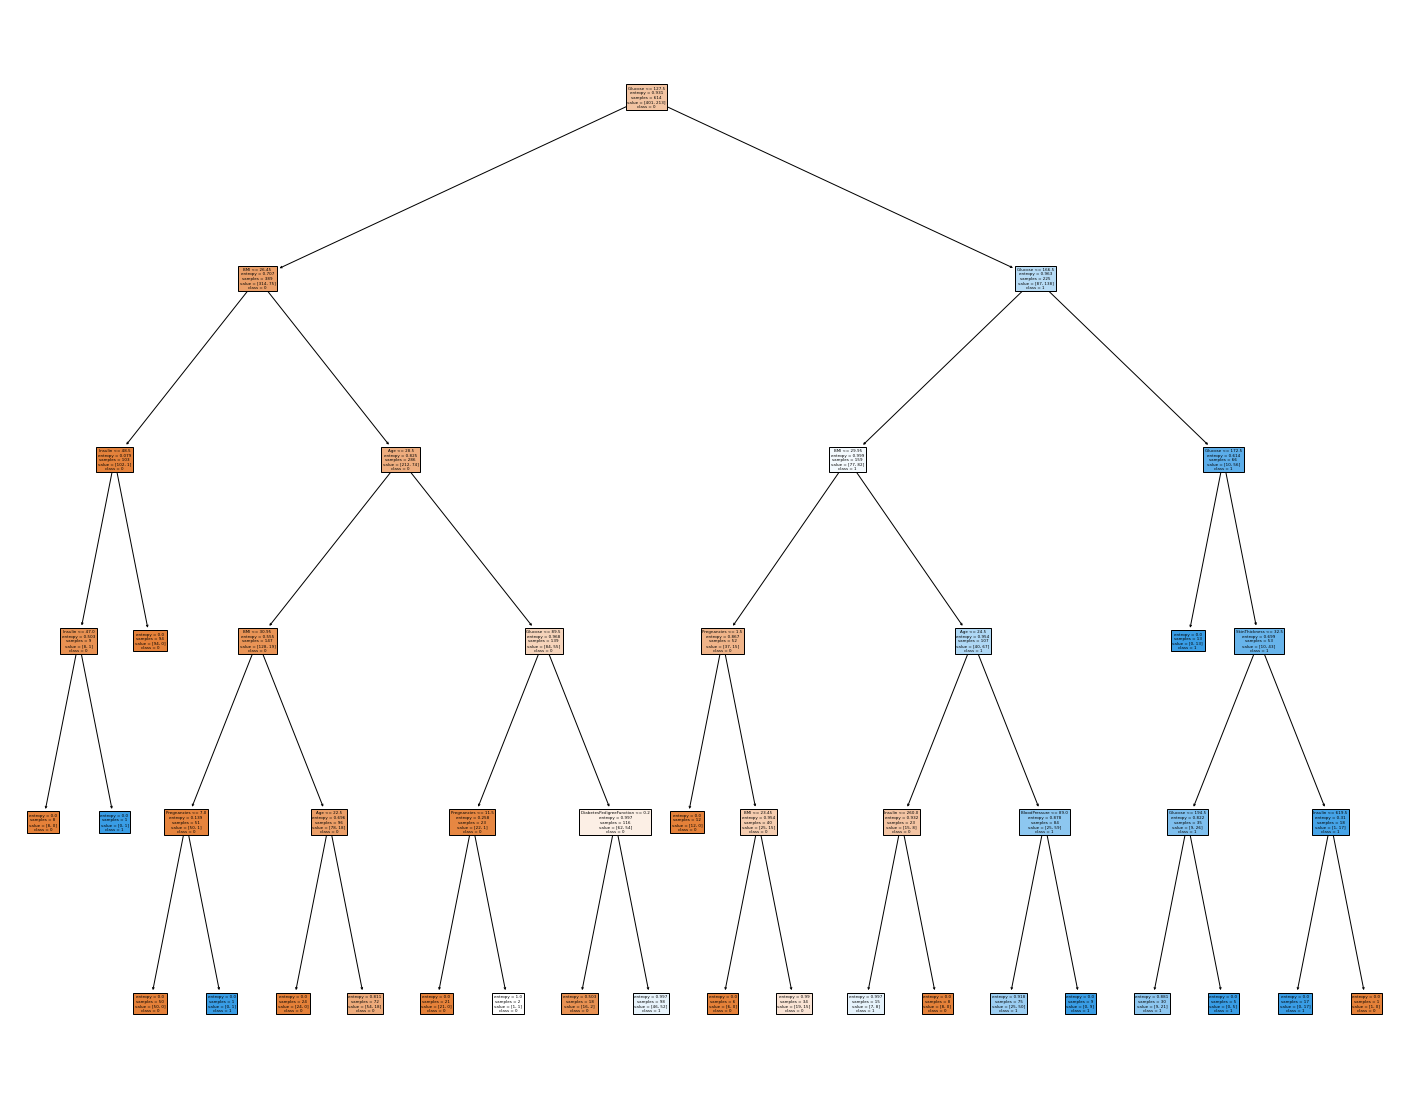

In [24]:
target_names=['0','1']
feature_cols = x.columns
from sklearn import tree
fig = plt.figure(figsize=(25,20))
v= tree.plot_tree(clf, 
                   feature_names = feature_cols,class_names=target_names,
                   filled=True)

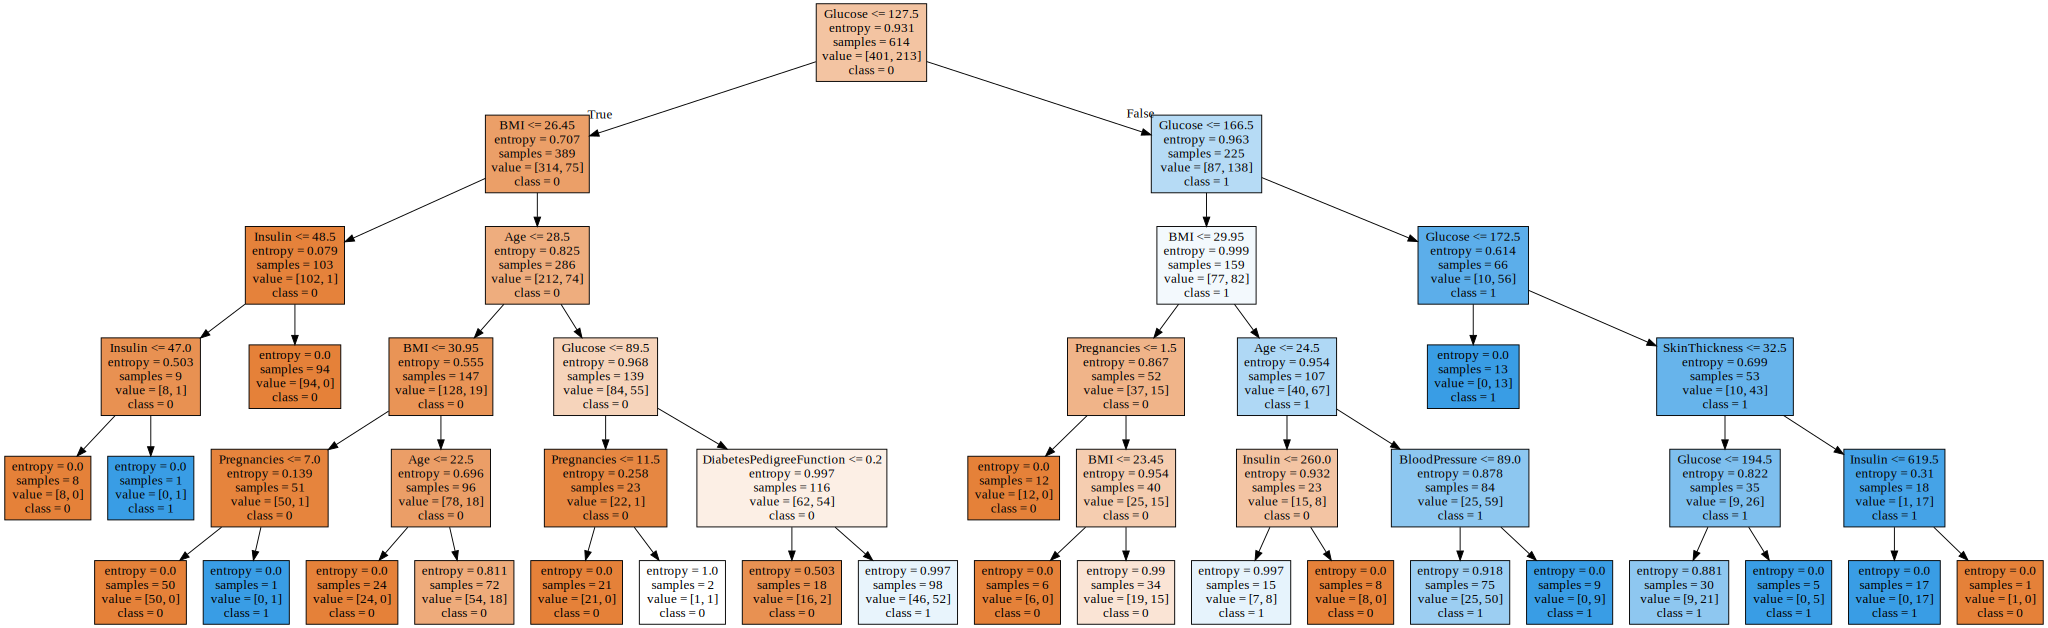

In [25]:
from sklearn import tree
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names = feature_cols,class_names=target_names,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph


In [26]:
#  Create Decision Tree classifer object using Entropy
clf = DecisionTreeClassifier(criterion='entropy',max_depth=6)
# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score 
print("Accuracy score on training data(Using gini index)", accuracy_score(y_true = y_train,y_pred = clf.predict(x_train)))
print("Accuracy score on testing data(Using gini index)", accuracy_score(y_true = y_test,y_pred = y_pred))

Accuracy score on training data(Using gini index) 0.8241042345276873
Accuracy score on testing data(Using gini index) 0.7857142857142857


In [28]:
clf.predict([[22,55,78,20,1,25,0.523,30]])

array([0], dtype=int64)